In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [4]:
#default theme
plt.style.use('ggplot')
sns.color_palette("tab10")
sns.set_theme(context = 'notebook' , style='darkgrid', font='sans-serif', font_scale = 1, rc = None)
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams.update({'font.size': 15})
plt.rcParams['font.family'] = 'sans-serif'

In [5]:
#read the data
df  = pd.read_csv('/Users/owner/Desktop/All Folders/fake_news_detector/src/dataset/fake_or_real_news.csv')
print(df.shape)
df.head

#DataFlair - Get the labels
labels=df.label
labels.head()

(6335, 4)


0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [6]:
target=df.label.value_counts()
target

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='label'>

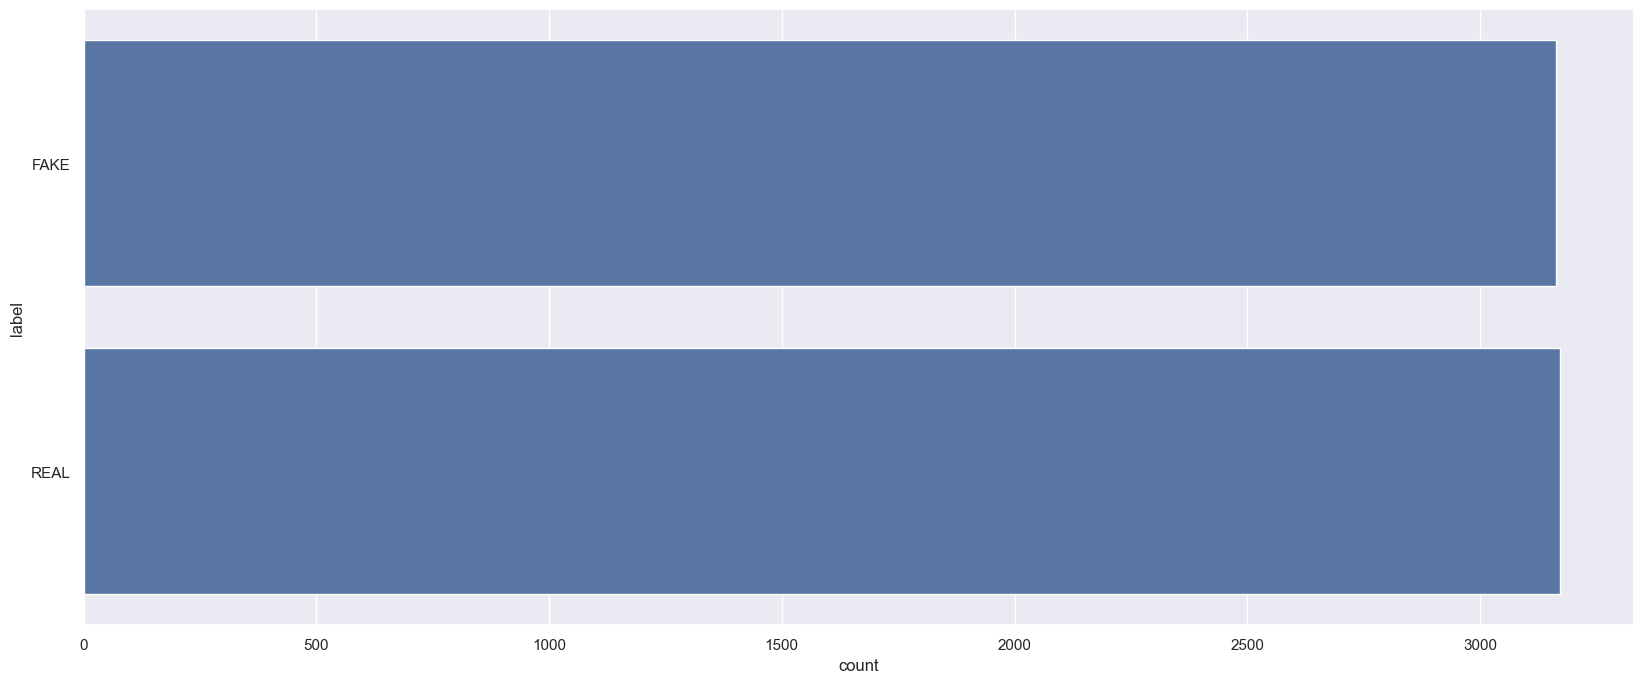

In [7]:
sns.countplot(df.label)


In [8]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [9]:
#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [10]:
#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.74%


In [11]:
#DataFlair - Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[588,  50],
       [ 42, 587]])

Prediction: FAKE
